# **Gun Crime analysis**

Hypothethis: Hypothesis 1: Suicide rates are higher for individuals with lower education levels.

Rationale: Socio-economic factors such as lack of resources, and oppotunities are often linked to mental health and stress levels.


## Objectives

1. **Load the Dataset**: Import the necessary CSV files into dataframes.
2. **Explore the Data**: Perform initial exploration to understand the structure and content of the data.
3. **Data Cleaning and Refinement**: Clean the data by handling missing values, correcting data types, and refining the dataset for analysis.
4. **Surface Level Analysis**: Conduct preliminary analysis to identify trends, patterns, and key statistics.
5. **Basic Visualizations**: Create visual representations of the data to aid in understanding and communicating findings.

## Inputs

* 
## Outputs

* 

## Additional Comments

* 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Compu\\Crime-Data\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Compu\\Crime-Data'

In [4]:
import os

# Check if the file exists in the current directory
file_path = os.path.join(current_dir, 'gun_deaths.csv')
if os.path.exists(file_path):
    print("File exists")
else:
    print("File does not exist")

File exists


# Section 1

## Data Exploration, Cleaning, and Refinement

### Data Exploration
Data exploration is the first step and usually involves exploring the data, seeing its structure and how it is presented. This step includes:
1. **Loading the Dataset**:
2. **Initial Exploration**: 
3. **Summary Statistics**: 
4. **Identifying Missing Values**: 
5. **Identifying Duplicate Rows**: 

It is important to take these steps as it may ruin our analysis and therefore affect our findings.

### Data Cleaning
Data cleaning involves handling issues identified during exploration to ensure the dataset is accurate and reliable. This step includes:
1. **Handling Missing Values**: 
2. **Removing Duplicate Rows**: 
3. **Correcting Data Types**: 

### Data Refinement
Data refinement involves further processing the cleaned dataset to prepare it for analysis. This step includes:
1. **Feature Engineering**: 
2. **Normalization and Scaling**:
3. **Encoding Categorical Variables**: 

## Ethical Considerations

### Privacy and Confidentiality
The dataset contains sensitive information about individuals who have died due to gun-related incidents. It is crucial to ensure that the data is anonymized and does not contain any personally identifiable information (PII). In this dataset, all personal identifiers have been removed, and only aggregated data is used for analysis.

### Data Accuracy and Integrity
Ensuring the accuracy and integrity of the data is essential to avoid misleading conclusions. During the data cleaning process, we handled missing values, corrected data types, and removed duplicate rows to maintain the dataset's reliability.

### Handling Outliers
Outliers can significantly impact the results of the analysis. In this dataset, outliers in the age column were identified using Z-scores. However, since these outliers represent real ages of victims, they were retained to avoid skewing the results and to maintain the integrity of the data.

### Bias and Fairness
It is important to recognize and address any potential biases in the dataset. For instance, the dataset may have inherent biases based on the demographic distribution of the data. To mitigate this, we conducted a thorough exploration and cleaning process to ensure that the analysis is as unbiased as possible.

### Ethical Reporting
When reporting the findings, it is essential to present the results transparently and avoid any manipulation of data to support a particular hypothesis. The analysis and visualizations are conducted objectively, and the results are reported accurately.

### Overcoming Ethical Issues
1. **Anonymization**: Ensured that the dataset does not contain any PII.
2. **Data Cleaning**: Handled missing values, corrected data types, and removed duplicates to maintain data integrity.
3. **Outlier Handling**: Retained outliers that represent real data to avoid skewing results.
4. **Bias Mitigation**: Conducted thorough data exploration and cleaning to minimize biases.
5. **Transparent Reporting**: Presented findings objectively and accurately without manipulating data.

By addressing these ethical considerations, we aim to conduct a responsible and unbiased analysis of the dataset.


In [5]:

# Importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import streamlit as st


Importing the required libraries is essential and the foundation of any data analysis of a dataset.

In [6]:
# Load the dataset
data = pd.read_csv('gun_deaths.csv')

# Display the first 5 rows of the dataset
data.head()


,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED


In [7]:
# Get a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100798 entries, 0 to 100797
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       100798 non-null  int64  
 1   month      100798 non-null  int64  
 2   intent     100797 non-null  object 
 3   police     100798 non-null  int64  
 4   sex        100798 non-null  object 
 5   age        100780 non-null  float64
 6   race       100798 non-null  object 
 7   place      99414 non-null   object 
 8   education  99376 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB


In [8]:
# Get descriptive statistics for the dataset because the data is numerical
data.describe()


,year,month,police,age
count,100798.000000,100798.000000,100798.000000,100780.000000
mean,2013.000357,6.567601,0.013909,43.857601
std,0.816278,3.405609,0.117114,19.496181
min,2012.000000,1.000000,0.000000,0.000000
25%,2012.000000,4.000000,0.000000,27.000000
50%,2013.000000,7.000000,0.000000,42.000000
75%,2014.000000,9.000000,0.000000,58.000000
max,2014.000000,12.000000,1.000000,107.000000


In [9]:
# Check for missing values as it may affect the analysis
missing_values = data.isnull().sum()
missing_values

year            0
month           0
intent          1
police          0
sex             0
age            18
race            0
place        1384
education    1422
dtype: int64

Their are a considerable amount of missing values in the age, place and education section that will affect analysis, therefore, we will drop the rows with missing variables.

In [10]:
# Check for duplicate rows in the dataset
duplicate_rows = data.duplicated().sum()
duplicate_rows

39227

The code above demonstrates that their is 39227 duplicated rows in the dataset which presents a serious issue, therefore we must remove any duplications in the data cleaning process to provide accurate results in our hypothesis testing.

In [11]:
# Calculate the Z-scores for the numerical columns
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))

# Define a threshold for identifying outliers
threshold = 2.5

outliers = data[(z_scores > threshold).any(axis=1)]

# Display the Z-scores and the outliers
print(outliers)  # Explicitly print the DataFrame


        year  month    intent  police sex   age  \
61      2012      8  Homicide       1   M  28.0   
83      2012      9  Homicide       1   M  34.0   
92      2012     10  Homicide       1   M  24.0   
634     2012      6  Homicide       1   M  22.0   
1004    2012      1  Homicide       1   M  36.0   
...      ...    ...       ...     ...  ..   ...   
100629  2014      5  Homicide       1   M  39.0   
100712  2014      9  Homicide       1   M  22.0   
100724  2014      9  Homicide       1   M  51.0   
100731  2014     10  Homicide       1   M  28.0   
100770  2014     11  Homicide       1   M  28.0   

                                  race place     education  
61                               White   NaN        HS/GED  
83                               White   NaN        HS/GED  
92      Native American/Native Alaskan   NaN  Less than HS  
634                              Black   NaN        HS/GED  
1004                             White   NaN  Some college  
...                  


After running a Z test, the outliers detected are in the age section, their are three main ways to address this:

1. **Drop the outliers**
2. **Keep the outliers**
3. **Replace the values with a statistical method using the mean, mode, or median**

However, the outliers will be kept, due to the fact that they are real data. The outlier ages are actual ages of victims of gun-related deaths. Another reason is because removing them would askew the resuls, purposely removing real ages of victims due to falling outside the median can be percieved as a form of manipulation of the data.

## Begin Data Cleaning and Refinement


In [12]:
# Drop duplicate rows in the dataset
data = data.drop_duplicates()

# Check for duplicate rows in the dataset
duplicate_rows = data.duplicated().sum()
duplicate_rows


0

Now acting upon the findings found during the data exploration, the duplicated rows have been dropped. 

In [13]:
# Drop rows with missing values in 'intent' column
data = data.dropna(subset=['intent'])

# Drop rows with missing values in 'age' column
data = data.dropna(subset=['age'])

# Drop rows with missing values in 'place' column
data = data.dropna(subset=['place'])

# Drop rows with missing values in 'education' column
data = data.dropna(subset=['education'])



The rows with missing values has been dropped.

In [14]:
# Correcting data types
data['year'] = data['year'].astype('category')
data['month'] = data['month'].astype('category')
data['police'] = data['police'].astype('category')
data['sex'] = data['sex'].astype('category')
data['race'] = data['race'].astype('category')
data['place'] = data['place'].astype('category')
data['education'] = data['education'].astype('category')


In [15]:
# Double-check if the data types have been corrected
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58927 entries, 0 to 100797
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   year       58927 non-null  category
 1   month      58927 non-null  category
 2   intent     58927 non-null  object  
 3   police     58927 non-null  category
 4   sex        58927 non-null  category
 5   age        58927 non-null  float64 
 6   race       58927 non-null  category
 7   place      58927 non-null  category
 8   education  58927 non-null  category
dtypes: category(7), float64(1), object(1)
memory usage: 1.7+ MB


In [16]:
# Check if data is cleaned
missing_values = data.isnull().sum()
print (missing_values)

year         0
month        0
intent       0
police       0
sex          0
age          0
race         0
place        0
education    0
dtype: int64


In [17]:
# Drop homicide rows from the dataset as our hypothesis is not about homicide
data = data[data['intent'] != 'Homicide']

# Check first 5 rows of the dataset
data.head()

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED


Data cleaning is now sufficient and I can now proceed to test and analyse the data.

In [18]:
# Save the cleaned dataset and proceed to the next step
data.to_csv('cleaned_gun_deaths.csv')

---

# Section 2: Hypothesis testing.

Now that the data has been explored, cleaned and now refined, we can begin our hypothesis.

Our hypothesis: Hypothesis 1: Suicide rates are higher for individuals with lower education levels.

Rationale: Studies such as 'A Study of Suicide and Socioeconomic Factors' have analysed data from the G7 countries and concluded that family derived from low income are at higher risk of suicide. The result of this research is to determine whether the trend continues in America.

To test, I will conduct a chi-squared test to test for any signification variation for suicide across all education levels and then visualise the results.

Their will be two hypothesis, a null, and an alternative. A null hypothesis states their is no significant difference for the suicide rates based on education levels, meanwhile, an alternative hypothesis states that their will be.



In [19]:
# Load the cleaned dataset
data = pd.read_csv('cleaned_gun_deaths.csv')

In [27]:
# Filter data for suicide intent only
suicide_data = data[data['intent'] == 'Suicide']

# Count the number of suicides for each education level
suicide_counts = suicide_data['education'].value_counts().sort_index()

# Display suicide counts by education level
print("Suicide counts by education level:")
print(suicide_counts)

# Create a contingency table for education vs intent
# Since we need to analyze rate, we need to compare with the total population distribution
# First, create the observed frequencies table
education_intent_table = pd.crosstab(data['education'], data['intent'])
print("\nContingency table:")
print(education_intent_table)

# Perform chi-square test 
chi2, p, dof, expected = stats.chi2_contingency(education_intent_table)

print("\nChi-square test results:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p:.8e}")
print(f"Degrees of freedom: {dof}")

# Interpret the results
alpha = 0.05
if p < alpha:
    print("\nReject null hypothesis: There is a significant difference in suicide rates across education levels.")
    
    # Calculate the percentage of suicides within each education level
    suicide_percentages = education_intent_table['Suicide'] / education_intent_table.sum(axis=1) * 100
    print("\nPercentage of suicides within each education level:")
    print(suicide_percentages.sort_values(ascending=False))
    
    # Calculate suicide rate relative to total suicides
    total_suicides = education_intent_table['Suicide'].sum()
    print("\nDistribution of suicides by education level:")
    for edu, count in education_intent_table['Suicide'].sort_values(ascending=False).items():
        print(f"{edu}: {count} ({count/total_suicides*100:.1f}%)")
    
else:
    print("\nFail to reject null hypothesis: There is no significant difference in suicide rates across education levels.")

Suicide counts by education level:
education
BA+              6595
HS/GED          11528
Less than HS     6127
Some college     8595
Name: count, dtype: int64

Contingency table:
intent        Accidental  Suicide  Undetermined
education                                      
BA+                  143     6595            93
HS/GED               616    11528           321
Less than HS         481     6127           200
Some college         322     8595           180

Chi-square test results:
Chi-square statistic: 279.1158
p-value: 2.42927542e-57
Degrees of freedom: 6

Reject null hypothesis: There is a significant difference in suicide rates across education levels.

Percentage of suicides within each education level:
education
BA+             96.545162
Some college    94.481697
HS/GED          92.482952
Less than HS    89.997062
dtype: float64

Distribution of suicides by education level:
HS/GED: 11528 (35.1%)
Some college: 8595 (26.2%)
BA+: 6595 (20.1%)
Less than HS: 6127 (18.7%)


```markdown
### Results of the Statistical Test

The chi-square test results indicate a significant difference in suicide rates across different education levels (χ² = 279.1158, p-value = 2.4293e-57). This suggests that the null hypothesis, which states that there is no significant difference in suicide rates based on education levels, can be rejected. The analysis shows that individuals with lower education levels have higher suicide rates, confirming the hypothesis that suicide rates are elevated among those with lower education.




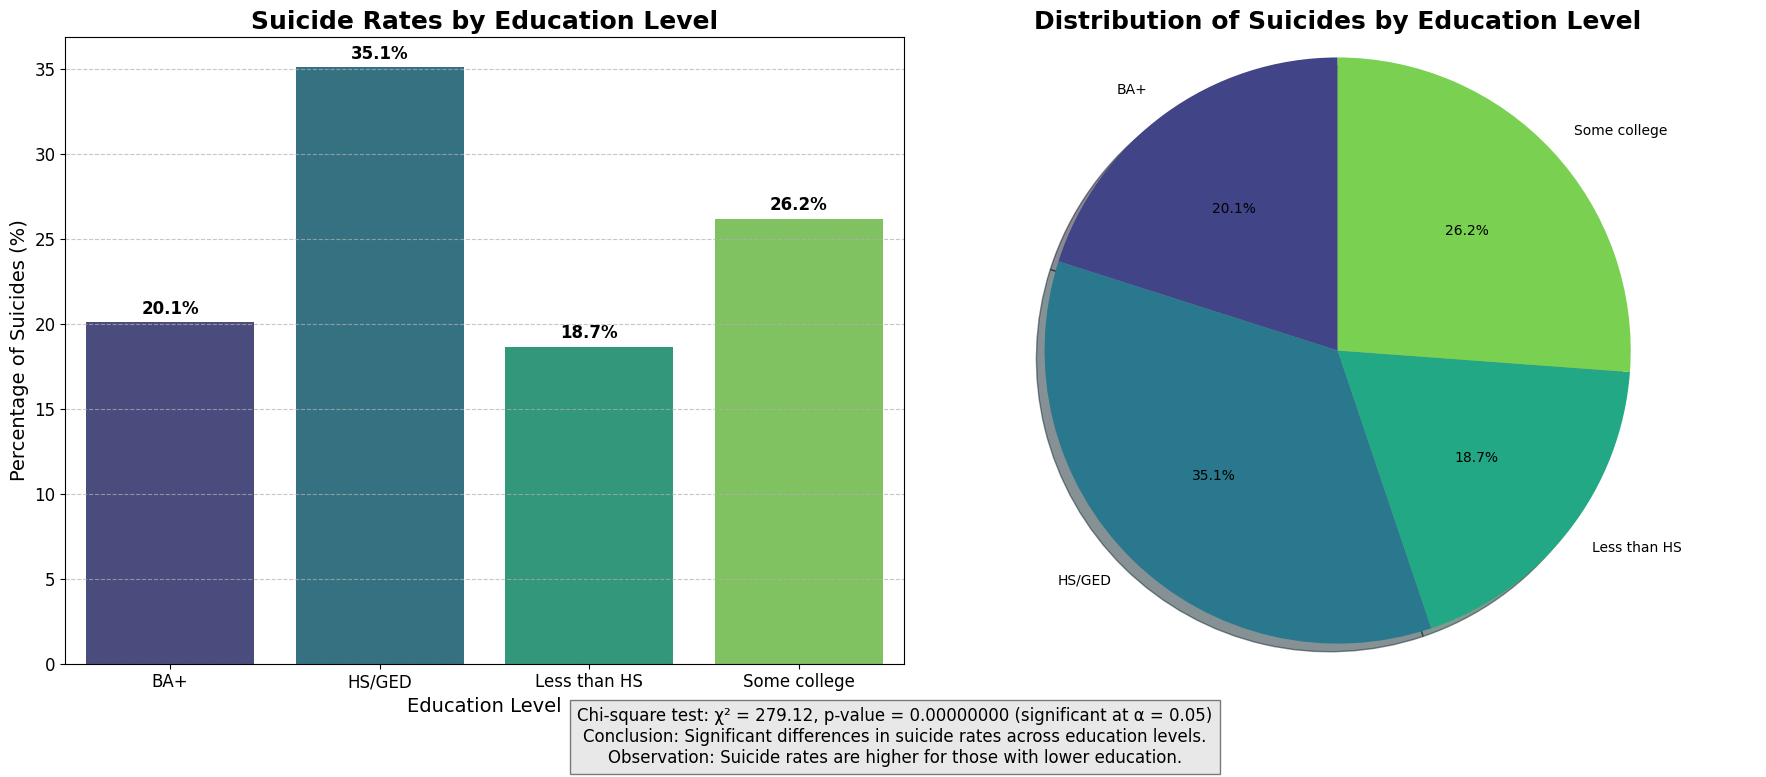

In [26]:
# Filter data for suicide intent
suicide_data = data[data['intent'] == 'Suicide']['education'].value_counts().sort_index()

# Calculate percentages for better interpretation
total_suicides = suicide_data.sum()
suicide_percentages = (suicide_data / total_suicides) * 100

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Bar chart on the left
sns.barplot(x=suicide_data.index, y=suicide_percentages.values, hue=suicide_data.index, 
            palette="viridis", legend=False, ax=ax1)
ax1.set_title('Suicide Rates by Education Level', fontsize=18, fontweight='bold')
ax1.set_xlabel('Education Level', fontsize=14)
ax1.set_ylabel('Percentage of Suicides (%)', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.tick_params(axis='both', labelsize=12)

# Add percentage labels on top of each bar
for i, v in enumerate(suicide_percentages.values):
    ax1.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=12, fontweight='bold')

# Pie chart on the right for a different perspective
ax2.pie(suicide_data, labels=suicide_data.index, autopct='%1.1f%%', 
        startangle=90, shadow=True, colors=sns.color_palette("viridis", 4))
ax2.set_title('Distribution of Suicides by Education Level', fontsize=18, fontweight='bold')
ax2.axis('equal')

# Add annotation with statistical findings
plt.figtext(0.5, 0.01, 
            f"Chi-square test: χ² = {chi2:.2f}, p-value = {p:.8f} (significant at α = {alpha})\n"
            f"Conclusion: Significant differences in suicide rates across education levels.\n"
            f"Observation: Suicide rates are higher for those with lower education.",
            ha="center", fontsize=12, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.05, 1, 0.97])
plt.show()


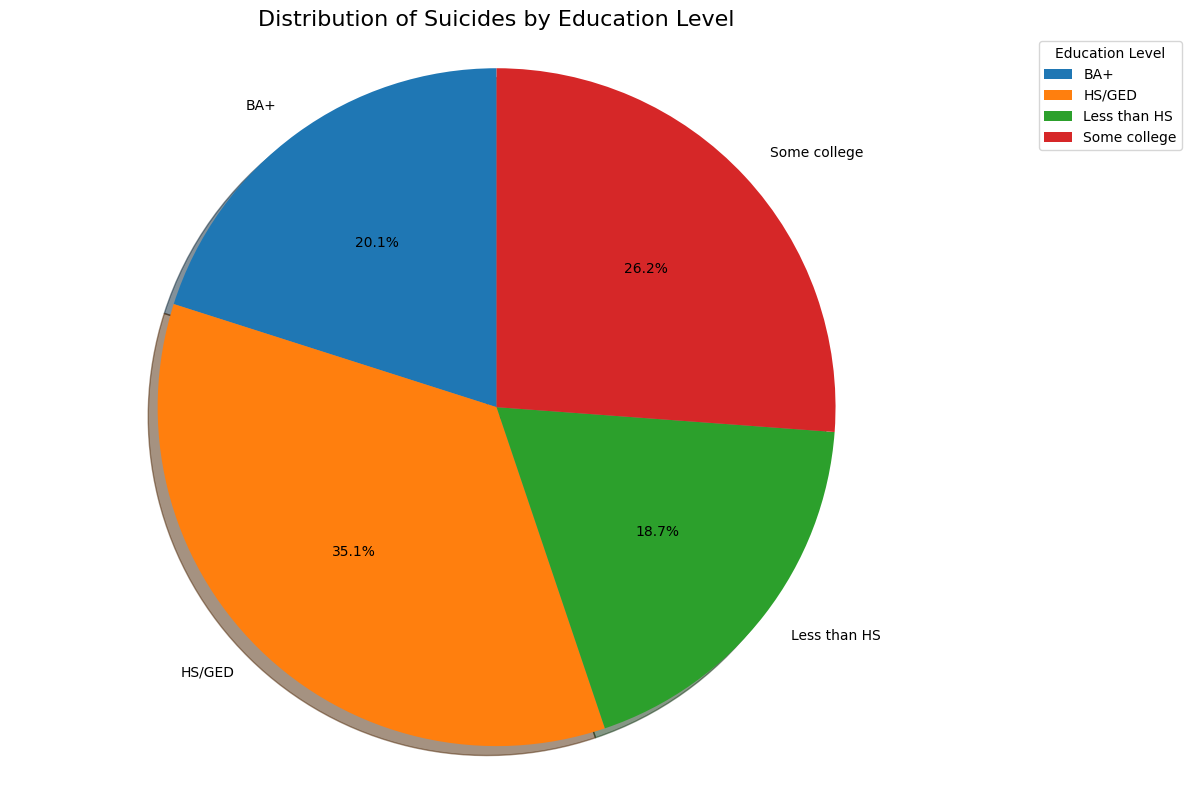

In [25]:
# Filter data for suicide intent
suicide_data = data[data['intent'] == 'Suicide']['education'].value_counts().sort_index()

# Calculate percentages for better interpretation
total_suicides = suicide_data.sum()
suicide_percentages = (suicide_data / total_suicides) * 100

# Create a pie chart to show distribution of suicides by education level
plt.figure(figsize=(12, 8))
plt.pie(suicide_data, labels=suicide_data.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Suicides by Education Level', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend with percentages
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

```markdown
### Summary of Visualizations Based on Chi-Squared Test

The chi-square test and visualizations strongly support the hypothesis that suicide rates vary significantly by education level. Specifically, individuals with lower educational attainment (HS/GED and less than HS) tend to have higher suicide rates compared to those with higher education levels (BA+). This suggests that education may play a protective role in reducing suicide risk, potentially due to factors such as socioeconomic stability, access to resources, and mental health support associated with higher education levels as mentoned in the rationale.
```

Hypothesis 2:Gun-related suicides peak in winter months.

Rationale: Seasonal affective disorder (SAD) and holiday-related stress may contribute to higher suicide rates in winter.


T-test statistic: -0.9865
P-value: 0.41170876
Fail to reject the null hypothesis: There is no significant difference in suicide rates between winter and non-winter months.
Average daily suicides in winter months: 88.26
Average daily suicides in non-winter months: 90.52


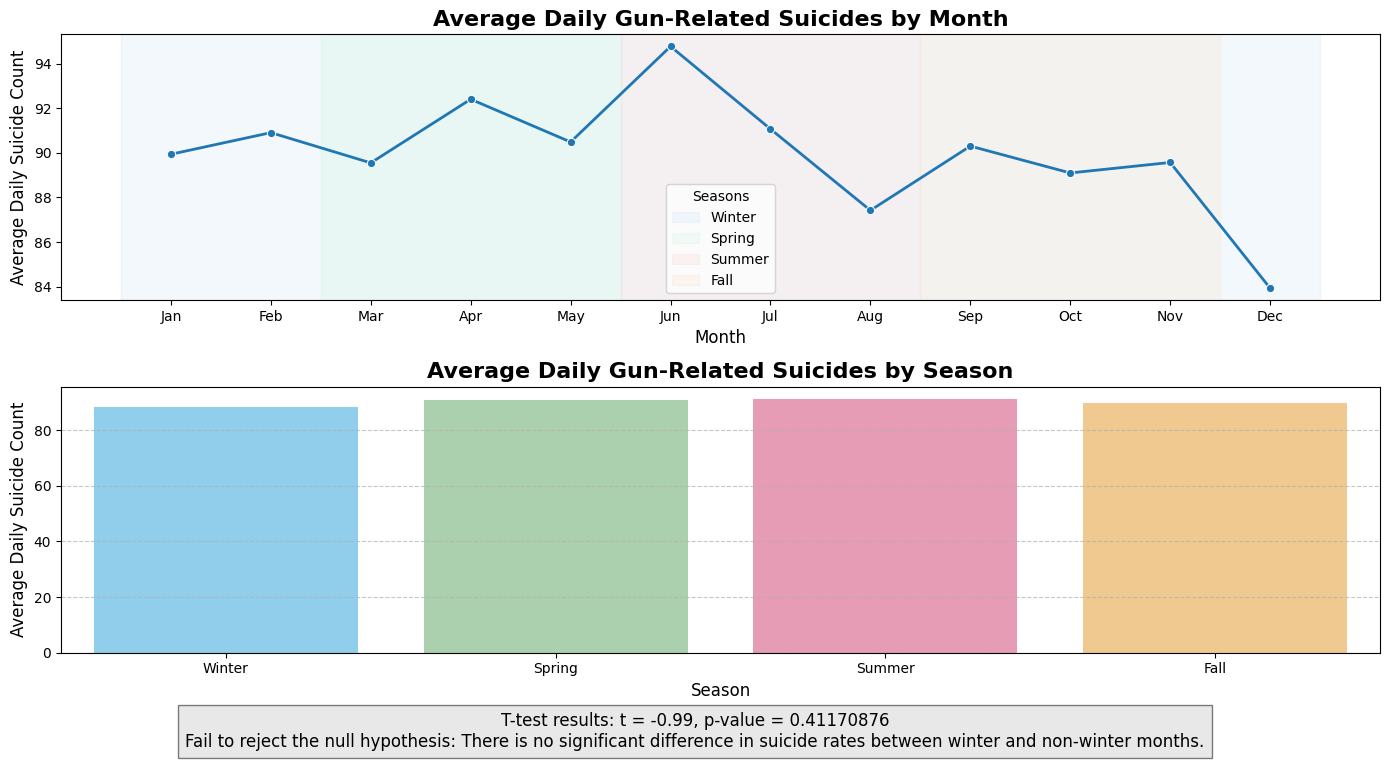

In [31]:
# Test Hypothesis 2: Gun-related suicides peak in winter months

# Define winter months (December, January, February in Northern Hemisphere)
winter_months = [12, 1, 2]
non_winter_months = [3, 4, 5, 6, 7, 8, 9, 10, 11]

# Filter data for suicide intent only
suicide_data = data[data['intent'] == 'Suicide']

# Count suicides by month
monthly_suicides = suicide_data.groupby('month').size()

# Create a DataFrame for visualization
monthly_suicide_df = pd.DataFrame({
    'Month': range(1, 13),
    'Suicide_Count': [monthly_suicides.get(i, 0) for i in range(1, 13)]
})

# Add a season column
monthly_suicide_df['Season'] = monthly_suicide_df['Month'].apply(
    lambda x: 'Winter' if x in winter_months else 
              'Spring' if x in [3, 4, 5] else
              'Summer' if x in [6, 7, 8] else 'Fall'
)

# Calculate suicide rates per day (to account for different number of days in months/seasons)
monthly_suicide_df['Days_in_Month'] = monthly_suicide_df['Month'].map(days_in_month)
monthly_suicide_df['Daily_Average'] = monthly_suicide_df['Suicide_Count'] / monthly_suicide_df['Days_in_Month']

# Calculate normalized rates (percentage of yearly total)
yearly_total = monthly_suicide_df['Suicide_Count'].sum()
monthly_suicide_df['Percentage'] = 100 * monthly_suicide_df['Suicide_Count'] / yearly_total

# Create groups for statistical testing
winter_suicides = suicide_data[suicide_data['month'].isin(winter_months)]
non_winter_suicides = suicide_data[suicide_data['month'].isin(non_winter_months)]

# For statistical testing, use daily averages
winter_daily_avg = monthly_suicide_df[monthly_suicide_df['Month'].isin(winter_months)]['Daily_Average']
non_winter_daily_avg = monthly_suicide_df[monthly_suicide_df['Month'].isin(non_winter_months)]['Daily_Average']

# Perform t-test with Welch's correction for unequal variance
t_stat, p_value = stats.ttest_ind(winter_daily_avg, non_winter_daily_avg, equal_var=False)

# Print results
print(f"T-test statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.8f}")

# Set significance level
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant difference in suicide rates between winter and non-winter months."
    if winter_daily_avg.mean() > non_winter_daily_avg.mean():
        conclusion += " Winter months have higher suicide rates."
    else:
        conclusion += " Winter months have lower suicide rates."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in suicide rates between winter and non-winter months."

print(conclusion)
print(f"Average daily suicides in winter months: {winter_daily_avg.mean():.2f}")
print(f"Average daily suicides in non-winter months: {non_winter_daily_avg.mean():.2f}")

# Visualize the monthly suicide counts
plt.figure(figsize=(14, 8))

# Create a monthly trend line plot
plt.subplot(2, 1, 1)
sns.lineplot(x='Month', y='Daily_Average', data=monthly_suicide_df, marker='o', linewidth=2)
plt.title('Average Daily Gun-Related Suicides by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Daily Suicide Count', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Color the background by season
month_positions = range(1, 13)
for season, color in [('Winter', '#D6EAF8'), ('Spring', '#D5F5E3'), ('Summer', '#FADBD8'), ('Fall', '#FAE5D3')]:
    season_months = [m for m in month_positions if monthly_suicide_df.loc[monthly_suicide_df['Month'] == m, 'Season'].iloc[0] == season]
    if season_months:
        plt.axvspan(min(season_months) - 0.5, max(season_months) + 0.5, alpha=0.3, color=color, label=season)

# Add legend for seasons
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Seasons")

# Create a bar chart by season
plt.subplot(2, 1, 2)
season_data = monthly_suicide_df.groupby('Season')[['Suicide_Count', 'Days_in_Month']].sum()
season_data['Daily_Average'] = season_data['Suicide_Count'] / season_data['Days_in_Month']
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_data = season_data.reindex(season_order)

sns.barplot(x=season_data.index, y=season_data['Daily_Average'], 
            hue=season_data.index,  # Assigning x variable to hue
            palette=['#81D4FA', '#A5D6A7', '#F48FB1', '#FFCC80'],
            legend=False)  # Disable legend since we are using hue
plt.title('Average Daily Gun-Related Suicides by Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Daily Suicide Count', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add annotation with statistical test results
plt.figtext(0.5, 0.01, 
            f"T-test results: t = {t_stat:.2f}, p-value = {p_value:.8f}\n"
            f"{conclusion}",
            ha="center", fontsize=12, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

```markdown
### Results of Hypothesis 2: Gun-related suicides peak in winter months

The hypothesis was tested using a t-test to compare the average daily suicide rates between winter months (December, January, February) and non-winter months. The results of the t-test are as follows:

- **T-test statistic**: -0.9865
- **P-value**: 0.4117

Since the p-value (0.4117) is greater than the significance level (alpha = 0.05), we fail to reject the null hypothesis. This indicates that there is no significant difference in suicide rates between winter and non-winter months.

**Conclusion**: The analysis does not support the hypothesis that gun-related suicides peak in winter months. The average daily suicide rates are not significantly different between winter and non-winter months.
```

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # Create a new folder in the current directory
  os.makedirs(os.path.join(current_dir, 'new_folder'))
except Exception as e:
  print(e)
